In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('sales_data_with_discounts.csv')
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [8]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

print("Numeric columns are:\n", numeric_data.columns)


Numeric columns are:
 Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [9]:
desc_stats = pd.DataFrame({
    'Mean': numeric_data.mean(),
    'Median': numeric_data.median(),
    'Mode': numeric_data.mode().iloc[0],
    'Standard Deviation': numeric_data.std()
})

print(desc_stats)

                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


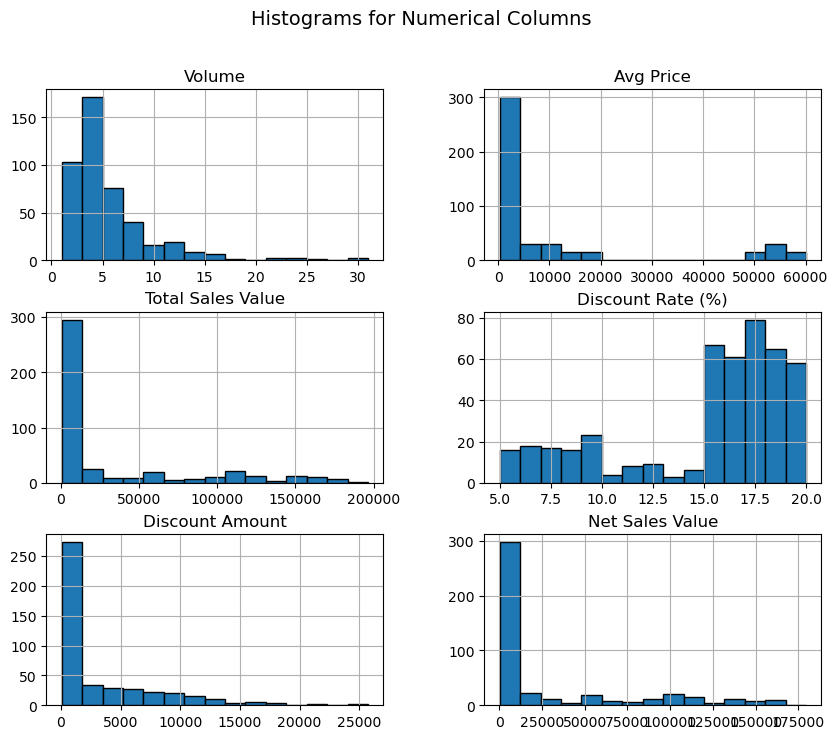

In [11]:
numeric_data.hist(figsize=(10,8), bins=15, edgecolor='black')
plt.suptitle('Histograms for Numerical Columns', fontsize=14)
plt.show()

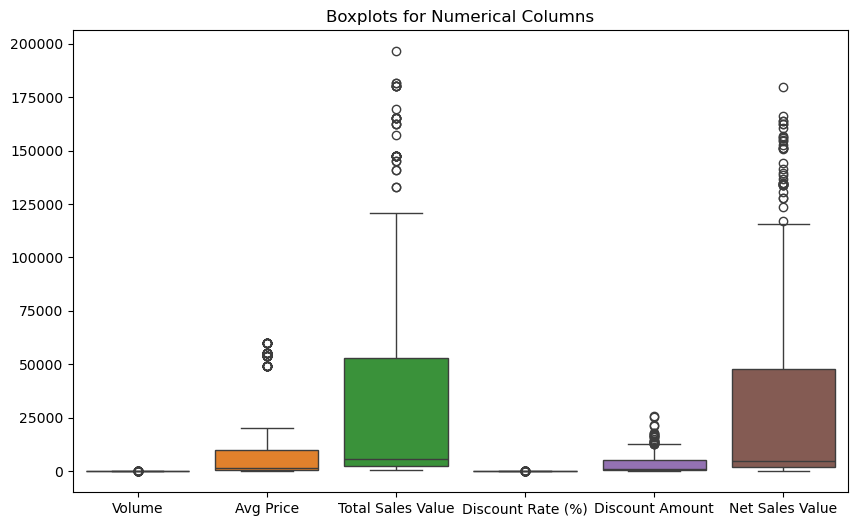

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=numeric_data)
plt.title('Boxplots for Numerical Columns')
plt.show()


Categorical Columns:
 Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


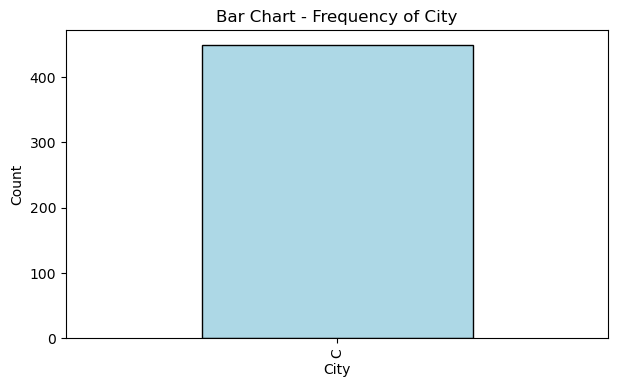

In [16]:
categorical_df = data.select_dtypes(include=['object'])
print("Categorical Columns:\n", categorical_df.columns)

# Example: Bar chart for City
plt.figure(figsize=(7,4))
data['City'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Bar Chart - Frequency of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
standardized_data = pd.DataFrame(
    scaler.fit_transform(numeric_data),
    columns=numeric_data.columns
)

# Display before and after comparison (first 5 rows)
print("=== Before Standardization ===")
print(numeric_data.head())

print("\n=== After Standardization ===")
print(standardized_data.head())


=== Before Standardization ===
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

=== After Standardization ===
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808  

In [22]:
# Apply One-Hot Encoding
dummy_data = pd.get_dummies(categorical_df,drop_first=True)

# Display the transformed dataset
print("=== Original Categorical Columns ===")
print(categorical_df.head())

print("\n=== After One-Hot Encoding ===")
print(dummy_data.head())

=== Original Categorical Columns ===
         Date       Day  SKU City       BU  Brand       Model
0  01-04-2021  Thursday  M01    C  Mobiles  RealU       RU-10
1  01-04-2021  Thursday  M02    C  Mobiles  RealU   RU-9 Plus
2  01-04-2021  Thursday  M03    C  Mobiles   YouM       YM-99
3  01-04-2021  Thursday  M04    C  Mobiles   YouM  YM-99 Plus
4  01-04-2021  Thursday  M05    C  Mobiles   YouM      YM-98 

=== After One-Hot Encoding ===
   Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  Date_05-04-2021  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Date_06-04-2021  Date_07-04-2021  Date_08-04-2021  Date_09-04-2021  \
0            False            False            